<a href="https://colab.research.google.com/github/pavel195/machine_learning/blob/main/LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Month: Дата записи.
# reference: Количество пассажиров (без пропусков).
# target: Поле с пропусками, которые нужно заполнить.
# missing: Указаны только те данные, которые пропущены в столбце target.

<ipython-input-5-b1a52d4d0c1f>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['target_filled_prev'] = df['target'].fillna(method='ffill')


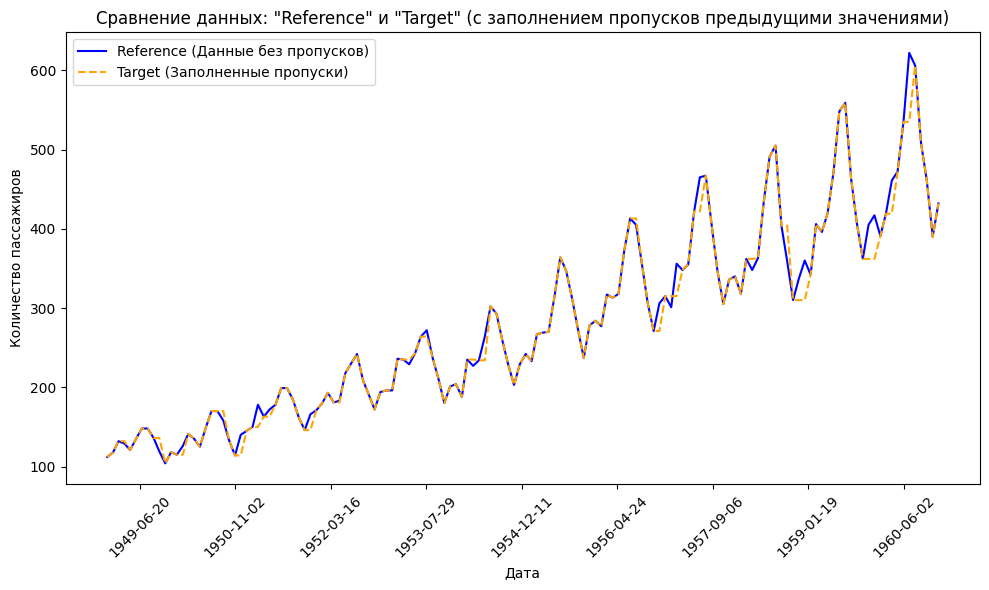

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('passengers2.csv')

# Заполнение пропусков предыдущими значениями
df['target_filled_prev'] = df['target'].fillna(method='ffill')

# Конвертируем столбец Month в формат даты
df['Month'] = pd.to_datetime(df['Month'])

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['reference'], label='Reference (Данные без пропусков)', color='blue')
plt.plot(df['Month'], df['target_filled_prev'], label='Target (Заполненные пропуски)', color='orange', linestyle='--')

# Оформление графика
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.title('Сравнение данных: "Reference" и "Target" (с заполнением пропусков предыдущими значениями)')
plt.xticks(rotation=45)

# Устанавливаем шаг по оси X, чтобы уменьшить количество меток
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.legend()

# Показать график
plt.tight_layout()
plt.show()


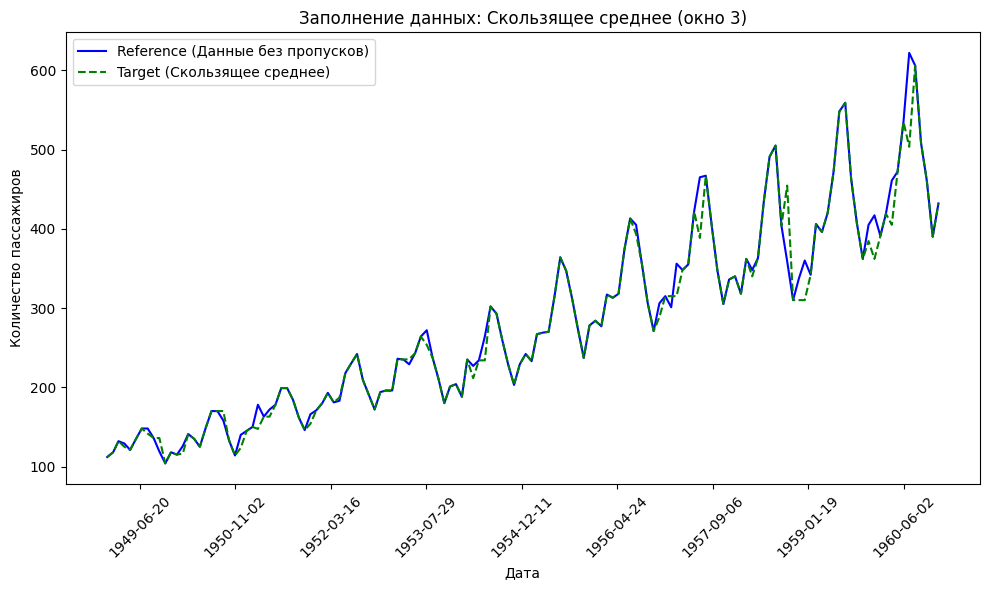

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('passengers2.csv')

# Конвертируем столбец Month в формат даты
df['Month'] = pd.to_datetime(df['Month'])

# Восполнение данных с помощью скользящего среднего (окно 3)
df['target_moving_avg'] = df['target'].fillna(df['target'].rolling(window=3, min_periods=1).mean())

# Построение графиков
plt.figure(figsize=(10, 6))

# График без пропусков (reference)
plt.plot(df['Month'], df['reference'], label='Reference (Данные без пропусков)', color='blue')

# График с заполненными данными с помощью скользящего среднего
plt.plot(df['Month'], df['target_moving_avg'], label='Target (Скользящее среднее)', color='green', linestyle='--')

# Оформление графика
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.title('Заполнение данных: Скользящее среднее (окно 3)')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.legend()

# Показать график
plt.tight_layout()
plt.show()


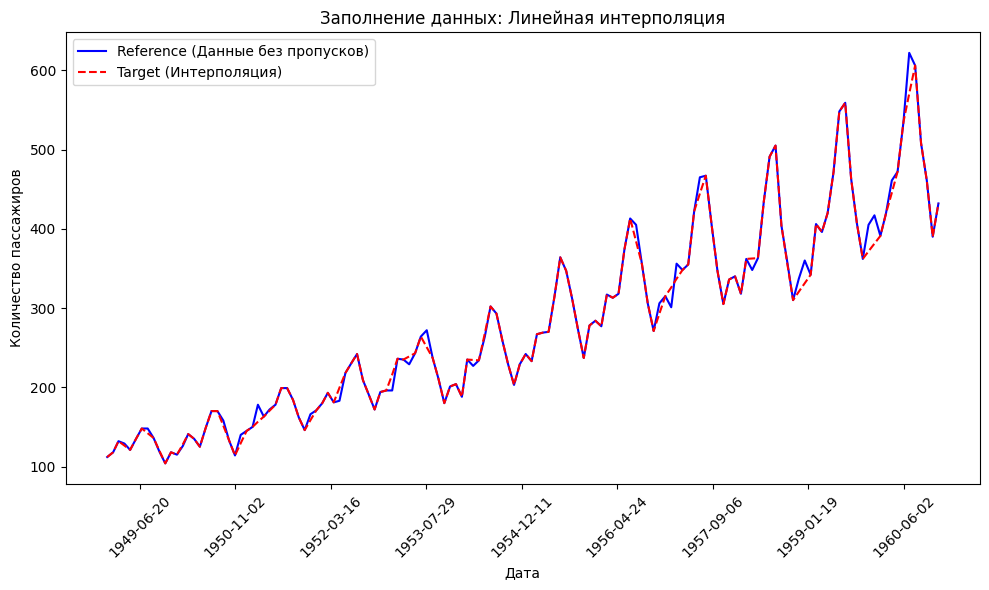

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('passengers2.csv')

# Конвертируем столбец Month в формат даты
df['Month'] = pd.to_datetime(df['Month'])

# Восполнение данных с помощью линейной интерполяции
df['target_interpolated'] = df['target'].interpolate(method='linear')

# Построение графиков
plt.figure(figsize=(10, 6))

# График без пропусков (reference)
plt.plot(df['Month'], df['reference'], label='Reference (Данные без пропусков)', color='blue')

# График с заполненными данными с помощью интерполяции
plt.plot(df['Month'], df['target_interpolated'], label='Target (Интерполяция)', color='red', linestyle='--')

# Оформление графика
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.title('Заполнение данных: Линейная интерполяция')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.legend()

# Показать график
plt.tight_layout()
plt.show()


<ipython-input-9-40a0f87ad3e9>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['target_exp_smoothing'] = df['target'].fillna(method='ffill').ewm(alpha=d, adjust=False).mean()


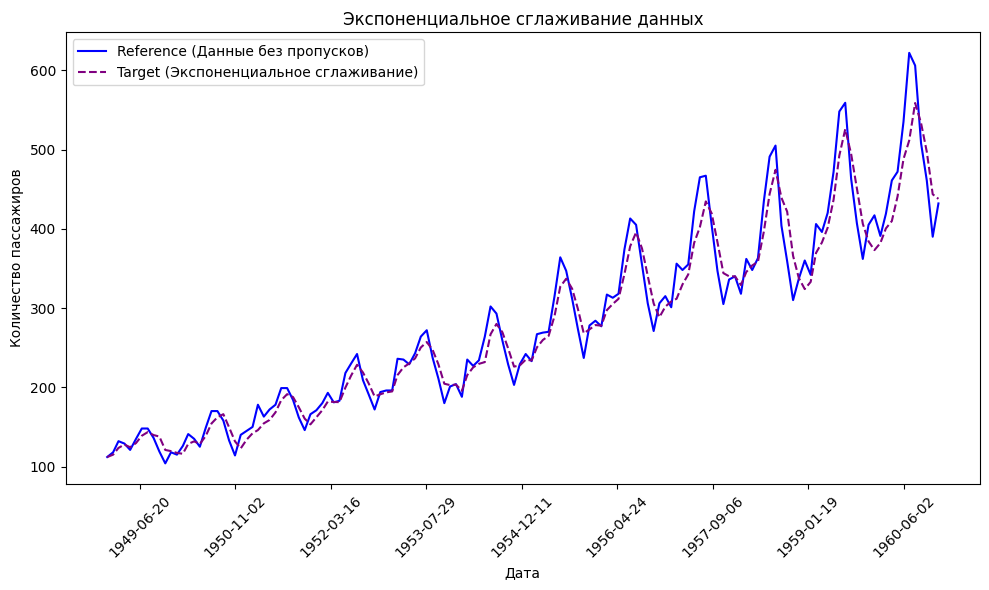

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Можно использовать встроенный метод ewm() в pandas, который реализует экспоненциальное взвешенное среднее
# Загрузка данных
df = pd.read_csv('passengers2.csv')

# Конвертируем столбец Month в формат даты
df['Month'] = pd.to_datetime(df['Month'])

# Применение экспоненциального сглаживания к данным target с параметром сглаживания d (например, d=0.5)
d = 0.5  # коэффициент сглаживания
df['target_exp_smoothing'] = df['target'].fillna(method='ffill').ewm(alpha=d, adjust=False).mean()

# Построение графиков
plt.figure(figsize=(10, 6))

# График без пропусков (reference)
plt.plot(df['Month'], df['reference'], label='Reference (Данные без пропусков)', color='blue')

# График с экспоненциальным сглаживанием
plt.plot(df['Month'], df['target_exp_smoothing'], label='Target (Экспоненциальное сглаживание)', color='purple', linestyle='--')

# Оформление графика
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.title('Экспоненциальное сглаживание данных')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.legend()

# Показать график
plt.tight_layout()
plt.show()
